In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [5]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.duplicated().sum()

0

In [8]:
df.shape

(10000, 14)

In [14]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [13]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

KeyError: "['RowNumber' 'CustomerId' 'Surname'] not found in axis"

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [17]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [19]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

KeyError: "None of [Index(['Geography', 'Gender'], dtype='object')] are in the [columns]"

In [20]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [21]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
X.shape

(10000, 11)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [27]:
X_train_trf

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [28]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [49]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [50]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_15 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 12        
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [52]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 1s 4ms/step - loss: 4646.1665 - accuracy: 0.6498 - val_loss: 986.6369 - val_accuracy: 0.6631
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 399.6148 - accuracy: 0.6917 - val_loss: 121.1868 - val_accuracy: 0.4963
Epoch 3/100
128/128 [==============================] - 0s 3ms/step - loss: 73.3205 - accuracy: 0.6913 - val_loss: 45.5605 - val_accuracy: 0.7575
Epoch 4/100
128/128 [==============================] - 0s 3ms/step - loss: 37.9298 - accuracy: 0.6872 - val_loss: 23.6524 - val_accuracy: 0.6950
Epoch 5/100
128/128 [==============================] - 0s 3ms/step - loss: 25.7559 - accuracy: 0.6961 - val_loss: 27.8453 - val_accuracy: 0.6900
Epoch 6/100
128/128 [==============================] - 0s 3ms/step - loss: 24.8360 - accuracy: 0.6931 - val_loss: 24.7552 - val_accuracy: 0.5431
Epoch 7/100
128/128 [==============================] - 0s 3ms/step - loss: 25.8974 - accuracy: 0.6834 - val_loss: 29.2098 - v

In [66]:
history.history

{'loss': [4646.16650390625,
  399.61480712890625,
  73.32050323486328,
  37.929771423339844,
  25.755884170532227,
  24.83603286743164,
  25.897363662719727,
  23.409643173217773,
  23.1803035736084,
  25.84908676147461,
  16.67078399658203,
  14.983016014099121,
  25.390033721923828,
  25.017383575439453,
  22.379487991333008,
  20.244173049926758,
  23.161916732788086,
  21.34416961669922,
  28.406414031982422,
  19.24102210998535,
  22.230667114257812,
  20.596933364868164,
  22.37398910522461,
  29.3406925201416,
  18.176389694213867,
  19.714860916137695,
  25.42169952392578,
  19.34018898010254,
  19.07538414001465,
  16.450458526611328,
  29.452760696411133,
  21.100692749023438,
  18.531400680541992,
  16.92474937438965,
  22.5021915435791,
  19.676898956298828,
  24.90131378173828,
  16.858957290649414,
  18.88947105407715,
  18.160804748535156,
  18.332916259765625,
  20.175643920898438,
  27.804513931274414,
  16.410192489624023,
  20.88631820678711,
  19.583032608032227,
  

In [58]:
model.layers[0].get_weights()

[array([[ 0.30061743, -0.345885  ,  0.41405925, -0.31827018, -0.08203655,
          0.31937516, -0.50462663,  0.13413756,  0.15798745,  0.06958181,
          0.10600302],
        [-1.2601653 , -0.5830903 , -1.2048972 ,  0.6660481 ,  0.17611521,
         -0.416211  , -0.82775855,  0.64098376, -1.3891666 ,  0.98363644,
         -0.32986286],
        [-0.4499982 ,  0.43197358,  0.16706607,  0.03437264,  0.24162751,
         -0.40753943,  0.1663703 ,  0.6854856 ,  0.21899094,  0.12550846,
          0.28783947],
        [-0.17979293,  0.00916824,  0.23704857,  0.18196611, -0.0591704 ,
         -0.43365103,  0.46539953, -0.4871524 ,  0.06791286,  0.41836616,
         -0.36274567],
        [-0.56321394, -0.1308362 , -0.459466  , -0.14836904, -0.02441293,
          0.34508508, -0.60221756,  0.764659  ,  0.5519005 , -0.02647327,
          0.15438212],
        [-0.22096255,  0.4808023 , -0.02716934, -0.44636536, -0.42799228,
         -0.481951  ,  0.44395342, -0.45726284,  0.3323303 , -0.4502707

In [59]:
y_pred = model.predict(X_test)

In [60]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [61]:
y_pred = y_pred.argmax(axis=-1)

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

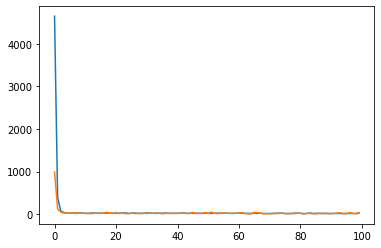

In [63]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

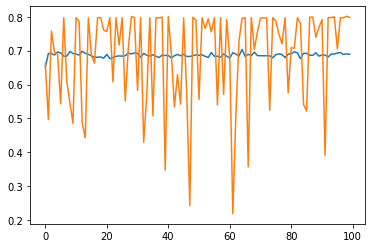

In [64]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])